In [1]:
#Install scikit-learn
!pip install -U scikit-learn

# Wine Data Set Processing

In [2]:
#Load required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [3]:
#Load the wine dataset from scikit learn and show descriptions of data
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df['target'] = data.target # Target column for visualization

In [4]:
print(wine_df.info())  # Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
# Dataset Info
print(f"No. of rows: {wine_df.shape[0]}")
print(f"No. of columns: {wine_df.shape[1]}")
print(f"\nNames of the columns: {wine_df.columns}")

No. of rows: 178
No. of columns: 14

Names of the columns: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


In [6]:
# Target (class) distribution
print(wine_df['target'].value_counts())

target
1    71
0    59
2    48
Name: count, dtype: int64


In [7]:
# Summary statistics of 'alcohol' content
print(wine_df['alcohol'].describe())

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64


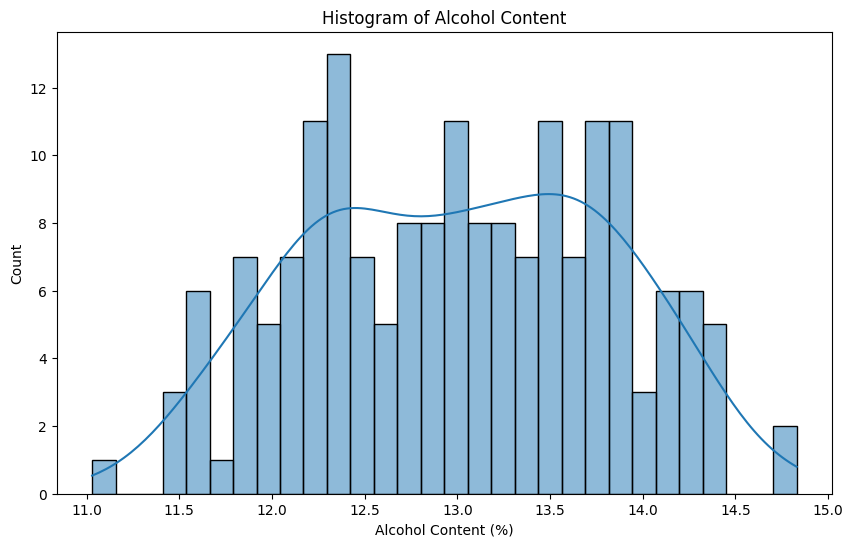

In [8]:
# Histogram of 'alcohol' content with a limit of 30 bars
plt.figure(figsize=(10, 6))
sns.histplot(wine_df['alcohol'], bins=30, kde=True)
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.show()

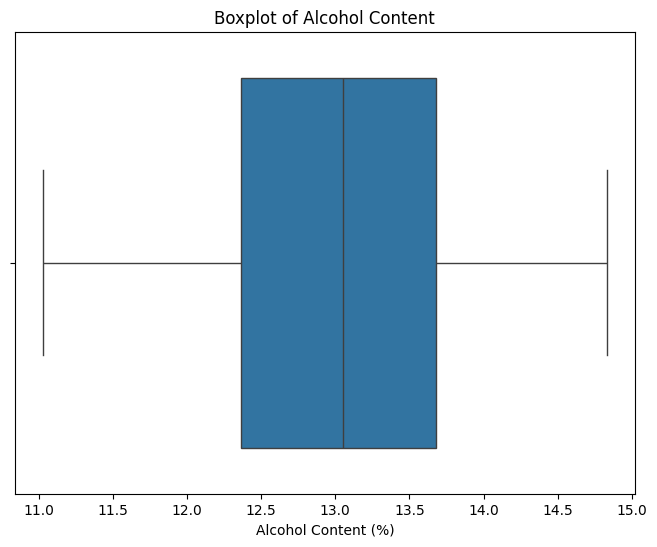

In [9]:
# Boxplot of 'alcohol' content
plt.figure(figsize=(8, 6))
sns.boxplot(x=wine_df['alcohol'])
plt.title('Boxplot of Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.show()

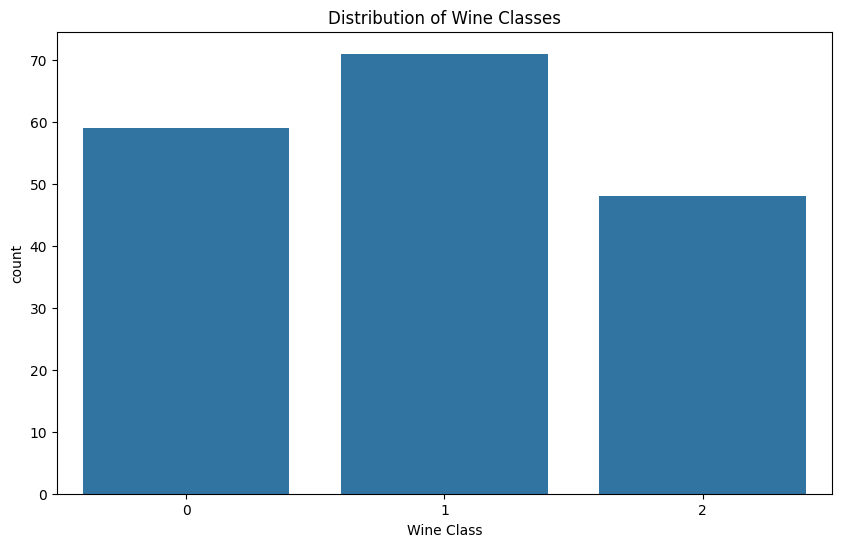

In [10]:
# Bar plot of 'target' (class)
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=wine_df)
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.show()

In [11]:
# Create a two-way table
pd.crosstab(wine_df['alcohol'], wine_df['target'])

#This shows how many members of each class have a specific alcohol content

target,0,1,2
alcohol,,,
11.03,0,1,0
11.41,0,1,0
11.45,0,1,0
11.46,0,1,0
11.56,0,1,0
...,...,...,...
14.37,1,0,0
14.38,2,0,0
14.39,1,0,0


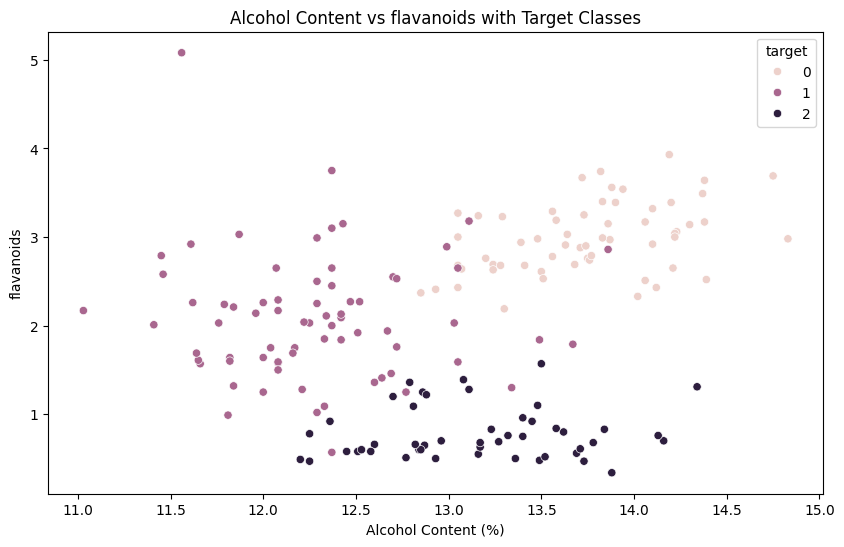

In [12]:
# Scatter plot of 'alcohol' content vs 'flavanoids' with target classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='flavanoids', hue='target', data=wine_df)
plt.title('Alcohol Content vs flavanoids with Target Classes')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('flavanoids')
plt.show()

In [13]:
# T-test to compare 'alcohol' content between different target classes
class_0_alcohol = wine_df.loc[wine_df['target'] == 0, 'alcohol']
class_1_alcohol = wine_df.loc[wine_df['target'] == 1, 'alcohol']
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(
    class_0_alcohol, class_1_alcohol, alternative='two-sided', equal_var=False)
print("T-test (two-sided) p-value:", p_value)

T-test (two-sided) p-value: 5.926412330452344e-34


In [14]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [16]:
from sklearn.preprocessing import StandardScaler

# Split data into features and label
features = wine_df[data.feature_names].copy()
labels = wine_df["target"].copy()
features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [17]:
# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(features)

# Transform features
X_scaled = scaler.transform(features.values)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
print(X_scaled[0]) # View first instance of scaled model

[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
  1.01300893]


In [19]:
print(features.iloc[0]) # View first instance of unscaled model

alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                                  labels,
                                                             train_size=.7,
                                                           random_state=0)

# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled) / len(features) * 100)}% \n\
Test size: {round(len(X_test_scaled) / len(features) * 100)}%")


Train size: 70% 
Test size: 30%


In [21]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
# Initializing the model
logistic_regression = LogisticRegression()
# Training the models
logistic_regression.fit(X_train_scaled, y_train)
# Making predictions with the model
log_reg_preds = logistic_regression.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [22]:
## Support Vector Machine

from sklearn.svm import SVC
# Initializing the model
svm = SVC()
# Training the models
svm.fit(X_train_scaled, y_train)
# Making predictions with the model
svm_preds = svm.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [23]:
## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
# Initializing the model
tree = DecisionTreeClassifier(random_state=0)
# Training the models
tree.fit(X_train_scaled, y_train)
# Making predictions with the model
tree_preds = tree.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      0.95      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



# Sub Task 1

Change the random state of the Decision tree classifier (for example set it to 42), what was the effect of this change

## Effects of the Changes

### 1.  Slight Decrease in Accuracy

The overall average accuracy dropped from 0.94 to 0.93 as random_state was changed to 42

#### 2. Changes in Class-wise Metrics

*   Class 0: F1 decreased slightly from 0.94 to 0.92
*   Class 1: Recall decreased slightly from 0.95 to 0.91, F1 decreased slightly from 0.94 to 0.92
*   Class 2: Recall increased from 0.93 to 1.00, and F1 score increased 0.93 to 0.96





In [24]:
## Changing Random State to 42

from sklearn.tree import DecisionTreeClassifier
# Initializing the model
tree = DecisionTreeClassifier(random_state=42)
# Training the models
tree.fit(X_train_scaled, y_train)
# Making predictions with the model
tree_preds = tree.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.91      0.91      0.91        22
           2       0.93      1.00      0.96        13

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



# Clustering for Wine Dataset

In [25]:
# Importing necessary libraries for clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

In [26]:
# Load the wine dataset
data = load_wine()
X = data.data  # Features
y = data.target  # True labels (for adjusted Rand index)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the clustering algorithms to the scaled data
kmeans_labels = kmeans.fit_predict(X_scaled)
agg_labels = agg_clustering.fit_predict(X_scaled)

In [28]:
# Evaluate K-means clustering performance using multiple metrics
metrics_kmeans = {
    'Silhouette Score': silhouette_score(X_scaled, kmeans_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, kmeans_labels),
    'Calinski-Harabasz Score': calinski_harabasz_score(X_scaled, kmeans_labels),
    'Adjusted Rand Index': adjusted_rand_score(y, kmeans_labels)  # Using true labels for ARI
}

print("K-means Clustering Performance:")
for metric_name, metric_value in metrics_kmeans.items():
    print(f"{metric_name}: {metric_value:.4f}")

K-means Clustering Performance:
Silhouette Score: 0.2849
Davies-Bouldin Index: 1.3892
Calinski-Harabasz Score: 70.9400
Adjusted Rand Index: 0.8975


In [29]:
# Evaluate Agglomerative Clustering performance using multiple metrics
metrics_agg = {
    'Silhouette Score': silhouette_score(X_scaled, agg_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, agg_labels),
    'Calinski-Harabasz Score': calinski_harabasz_score(X_scaled, agg_labels),
    'Adjusted Rand Index': adjusted_rand_score(y, agg_labels)  # Using true labels for ARI
}

print("\nAgglomerative Clustering Performance:")
for metric_name, metric_value in metrics_agg.items():
    print(f"{metric_name}: {metric_value:.4f}")


Agglomerative Clustering Performance:
Silhouette Score: 0.2774
Davies-Bouldin Index: 1.4186
Calinski-Harabasz Score: 67.6475
Adjusted Rand Index: 0.7899


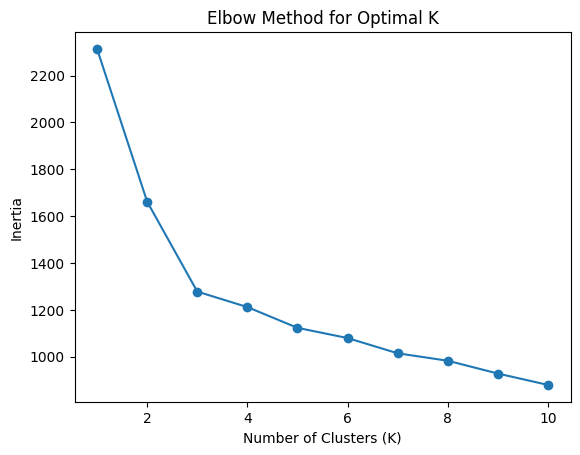

In [30]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

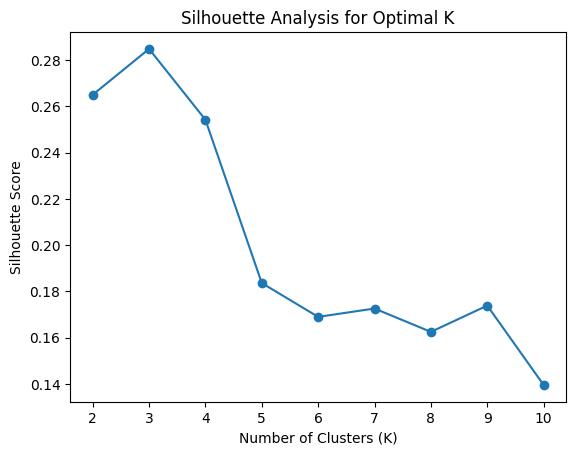

In [31]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

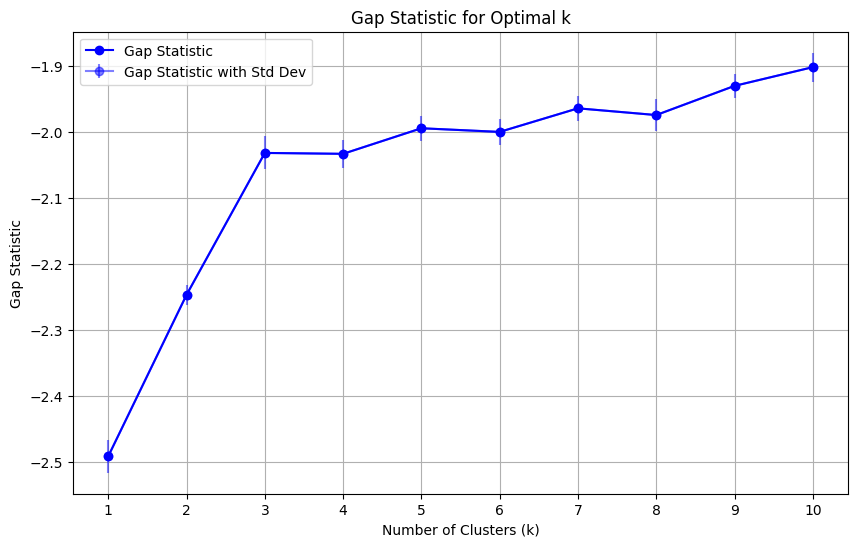

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


def compute_gap_statistic(data, k_range, n_ref_samples=10, random_seed=None):
    np.random.seed(random_seed)

    # Initialize arrays to store gap statistics and standard deviations
    gap_stats = []
    gap_stds = []

    for k in k_range:
        # Fit KMeans clustering to the data
        kmeans_model = KMeans(n_clusters=k, random_state=random_seed)
        kmeans_model.fit(data)

        # Calculate the within-cluster dispersion (log of sum of square distances)
        Wk = np.log(kmeans_model.inertia_)

        # Generate reference datasets and calculate their within-cluster dispersions
        ref_Wks = []
        for _ in range(n_ref_samples):
            # Generate reference dataset with the same shape and distribution as the original data
            ref_data = np.random.rand(*data.shape)

            # Fit KMeans to reference dataset
            ref_kmeans_model = KMeans(n_clusters=k, random_state=random_seed)
            ref_kmeans_model.fit(ref_data)

            # Calculate within-cluster dispersion of reference dataset
            ref_Wk = np.log(ref_kmeans_model.inertia_)
            ref_Wks.append(ref_Wk)

        # Calculate Gap Statistic and its standard deviation
        gap_stat = np.mean(ref_Wks) - Wk
        gap_std = np.std(ref_Wks) * np.sqrt(1 + 1/n_ref_samples)

        gap_stats.append(gap_stat)
        gap_stds.append(gap_std)

    return np.array(gap_stats), np.array(gap_stds)


# Define the range of k values (number of clusters) to evaluate
k_range = range(1, 11)

# Compute Gap Statistic for the range of k values
gap_stats, gap_stds = compute_gap_statistic(X_scaled, k_range, n_ref_samples=10, random_seed=42)

# Plotting the Gap Statistic curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, gap_stats, marker='o', color='b', label='Gap Statistic')
plt.errorbar(k_range, gap_stats, yerr=gap_stds, fmt='-o', color='b', alpha=0.5, label='Gap Statistic with Std Dev')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal k')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

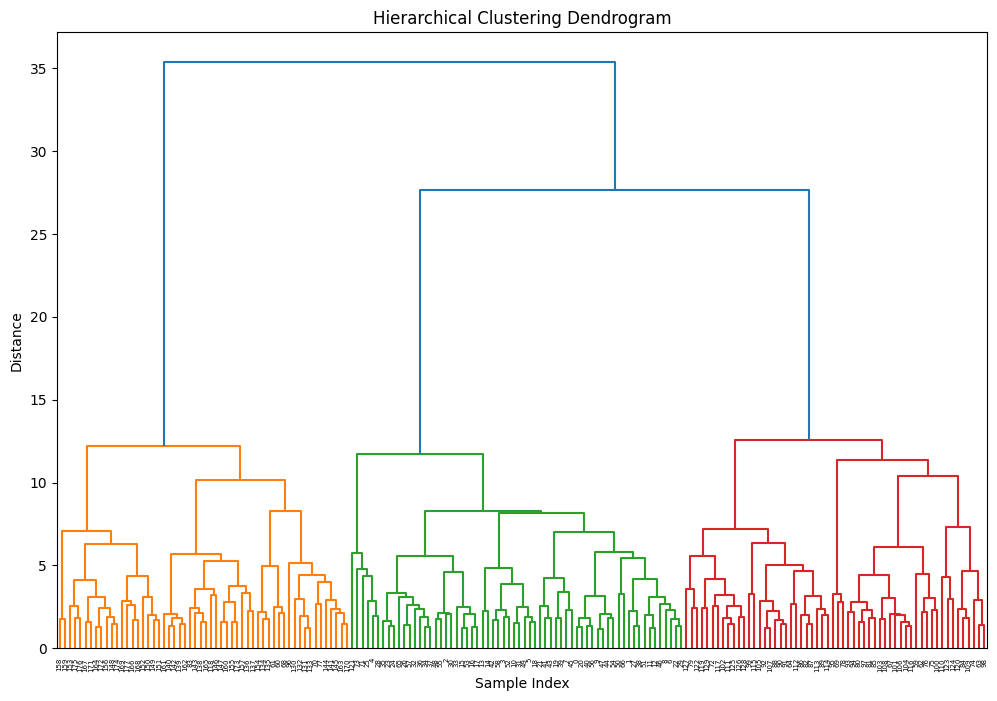

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Sub Task 2

Conduct an experiment using the 3 Machine learning algorithms on the Sklearn breast cancer dataset

In [34]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
breast_cancer_df['target'] = data.target

In [35]:
print(breast_cancer_df.info())  # Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [36]:
# Breast Cancer Dataset Info
print(f"No. of rows: {breast_cancer_df.shape[0]}")
print(f"No. of columns: {breast_cancer_df.shape[1]}")
print(f"\nNames of the columns: {breast_cancer_df.columns}")

No. of rows: 569
No. of columns: 31

Names of the columns: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [37]:
# Target (class) distribution
print(breast_cancer_df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [38]:
import pandas as pd

# Set the maximum number of columns to display to None (unlimited)
pd.set_option('display.max_columns', None)

# Summary statistics of "breast_cancer"
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [39]:
import pandas as pd

# Set the maximum number of columns to display to None (unlimited)
pd.set_option('display.max_columns', None)

breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [40]:
from sklearn.preprocessing import StandardScaler

# Split data into features and label
features = breast_cancer_df[data.feature_names].copy()
labels = breast_cancer_df["target"].copy()
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
scaler = StandardScaler()
scaler.fit(features)

X_scaled = scaler.transform(features.values)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
print(X_scaled[0]) # View first instance of scaled model

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [43]:
print(features.iloc[0]) # View first instance of unscaled model

mean radius                  17.990000
mean texture                 10.380000
mean perimeter              122.800000
mean area                  1001.000000
mean smoothness               0.118400
mean compactness              0.277600
mean concavity                0.300100
mean concave points           0.147100
mean symmetry                 0.241900
mean fractal dimension        0.078710
radius error                  1.095000
texture error                 0.905300
perimeter error               8.589000
area error                  153.400000
smoothness error              0.006399
compactness error             0.049040
concavity error               0.053730
concave points error          0.015870
symmetry error                0.030030
fractal dimension error       0.006193
worst radius                 25.380000
worst texture                17.330000
worst perimeter             184.600000
worst area                 2019.000000
worst smoothness              0.162200
worst compactness        

In [44]:
from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                                  labels,
                                                             train_size=.7,
                                                           random_state=0)

# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled) / len(features) * 100)}% \n\
Test size: {round(len(X_test_scaled) / len(features) * 100)}%")

Train size: 70% 
Test size: 30%


In [45]:
from sklearn.linear_model import LogisticRegression
# Initializing the model
logistic_regression = LogisticRegression()
# Training the models
logistic_regression.fit(X_train_scaled, y_train)
# Making predictions with the model
log_reg_preds = logistic_regression.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [46]:
from sklearn.svm import SVC
# Initializing the model
svm = SVC()
# Training the models
svm.fit(X_train_scaled, y_train)
# Making predictions with the model
svm_preds = svm.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [47]:
from sklearn.tree import DecisionTreeClassifier
# Initializing the model
tree = DecisionTreeClassifier(random_state=42)
# Training the models
tree.fit(X_train_scaled, y_train)
# Making predictions with the model
tree_preds = tree.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.97      0.92      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



# Sub Task 3

what is the performance of the random forest algorithm on the breast cancer dataset

## Overall Performance

The model achieved an accuracy of 0.96, meaning it correctly classified 96% of the samples in the test set. This indicates a strong overall performance.

## Class-wise Performance

1. Class 0 (Malignant): Precision of 95%, recall of 95%, F1-score of 0.95

2. Class 1 (Benign): Precision of 97%, recall of 97%, f1-score of 0.97

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Train the model
rf_classifier.fit(X_train_scaled, y_train)
# Make predictions
rf_preds = rf_classifier.predict(X_test_scaled)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Clustering tasks for the Sklearn BRCA dataset.

In [49]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

In [50]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # True labels (for adjusted Rand index)

In [51]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the clustering algorithms
kmeans = KMeans(n_clusters=4, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=4)

# Fit the clustering algorithms to the scaled data
kmeans_labels = kmeans.fit_predict(X_scaled)
agg_labels = agg_clustering.fit_predict(X_scaled)

In [52]:
# Evaluate K-means clustering performance using multiple metrics
metrics_kmeans = {
    'Silhouette Score': silhouette_score(X_scaled, kmeans_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, kmeans_labels),
    'Calinski-Harabasz Score': calinski_harabasz_score(X_scaled, kmeans_labels),
    'Adjusted Rand Index': adjusted_rand_score(y, kmeans_labels)  # Using true labels for ARI
}

print("K-means Clustering Performance:")
for metric_name, metric_value in metrics_kmeans.items():
    print(f"{metric_name}: {metric_value:.4f}")

K-means Clustering Performance:
Silhouette Score: 0.2742
Davies-Bouldin Index: 1.4928
Calinski-Harabasz Score: 158.6121
Adjusted Rand Index: 0.5985


In [53]:
# Evaluate Agglomerative Clustering performance using multiple metrics
metrics_agg = {
    'Silhouette Score': silhouette_score(X_scaled, agg_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X_scaled, agg_labels),
    'Calinski-Harabasz Score': calinski_harabasz_score(X_scaled, agg_labels),
    'Adjusted Rand Index': adjusted_rand_score(y, agg_labels)  # Using true labels for ARI
}

print("\nAgglomerative Clustering Performance:")
for metric_name, metric_value in metrics_agg.items():
    print(f"{metric_name}: {metric_value:.4f}")


Agglomerative Clustering Performance:
Silhouette Score: 0.2982
Davies-Bouldin Index: 1.4848
Calinski-Harabasz Score: 138.0905
Adjusted Rand Index: 0.5434


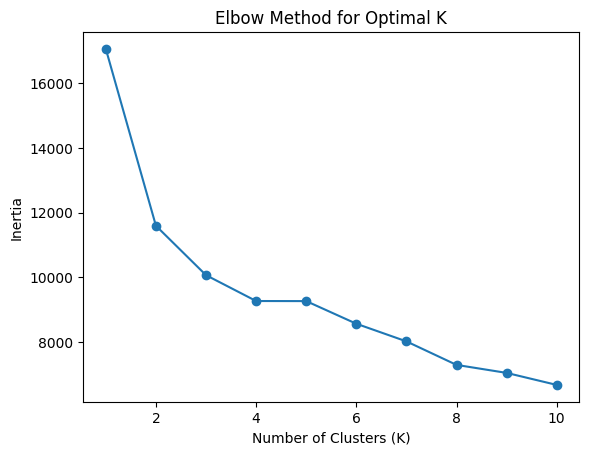

In [54]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

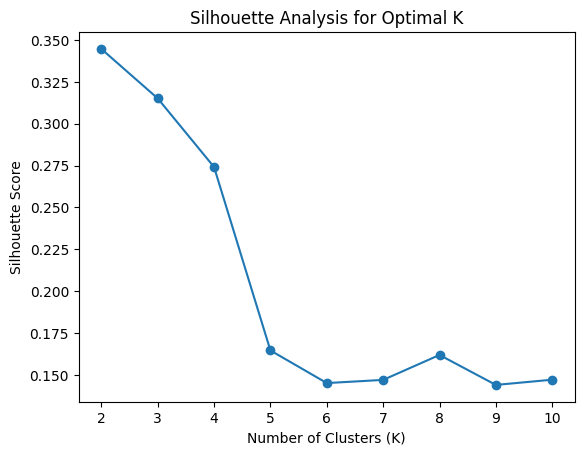

In [55]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

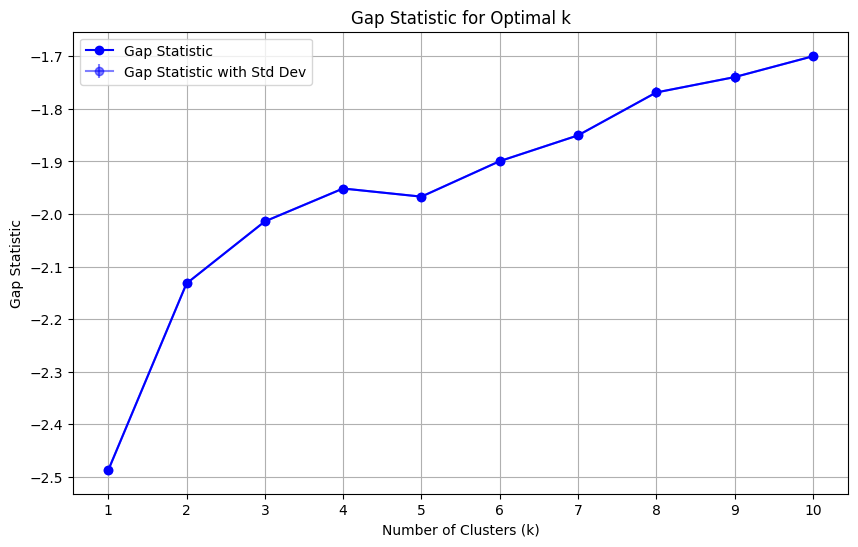

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


def compute_gap_statistic(data, k_range, n_ref_samples=10, random_seed=None):
    np.random.seed(random_seed)

    # Initialize arrays to store gap statistics and standard deviations
    gap_stats = []
    gap_stds = []

    for k in k_range:
        # Fit KMeans clustering to the data
        kmeans_model = KMeans(n_clusters=k, random_state=random_seed)
        kmeans_model.fit(data)

        # Calculate the within-cluster dispersion (log of sum of square distances)
        Wk = np.log(kmeans_model.inertia_)

        # Generate reference datasets and calculate their within-cluster dispersions
        ref_Wks = []
        for _ in range(n_ref_samples):
            # Generate reference dataset with the same shape and distribution as the original data
            ref_data = np.random.rand(*data.shape)

            # Fit KMeans to reference dataset
            ref_kmeans_model = KMeans(n_clusters=k, random_state=random_seed)
            ref_kmeans_model.fit(ref_data)

            # Calculate within-cluster dispersion of reference dataset
            ref_Wk = np.log(ref_kmeans_model.inertia_)
            ref_Wks.append(ref_Wk)

        # Calculate Gap Statistic and its standard deviation
        gap_stat = np.mean(ref_Wks) - Wk
        gap_std = np.std(ref_Wks) * np.sqrt(1 + 1/n_ref_samples)

        gap_stats.append(gap_stat)
        gap_stds.append(gap_std)

    return np.array(gap_stats), np.array(gap_stds)


# Define the range of k values (number of clusters) to evaluate
k_range = range(1, 11)

# Compute Gap Statistic for the range of k values
gap_stats, gap_stds = compute_gap_statistic(X_scaled, k_range, n_ref_samples=10, random_seed=42)

# Plotting the Gap Statistic curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, gap_stats, marker='o', color='b', label='Gap Statistic')
plt.errorbar(k_range, gap_stats, yerr=gap_stds, fmt='-o', color='b', alpha=0.5, label='Gap Statistic with Std Dev')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal k')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

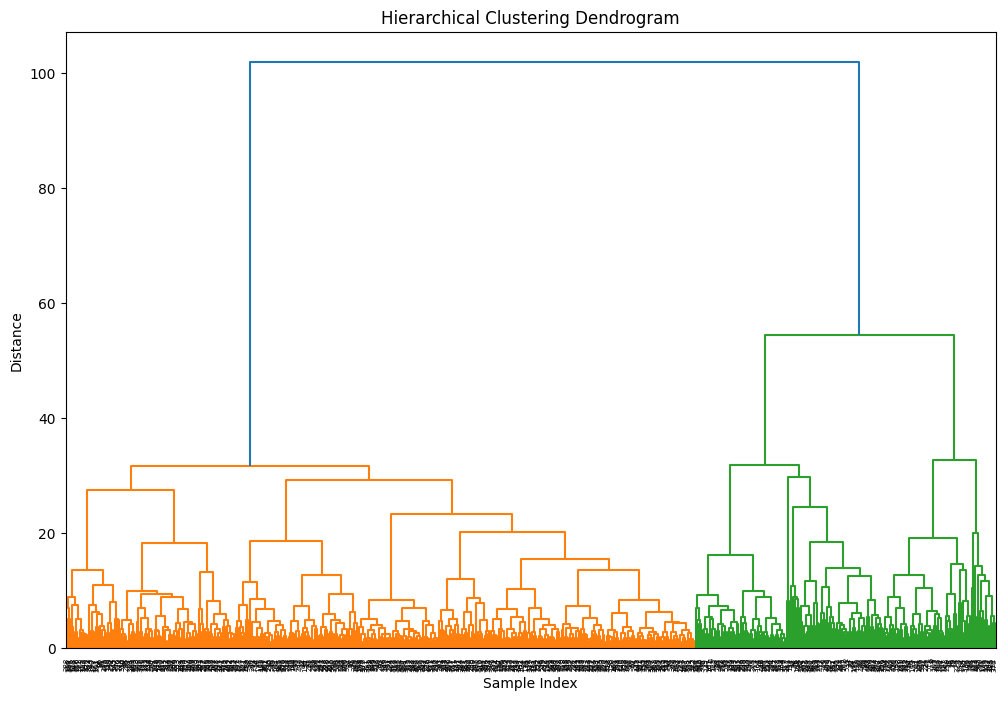

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Exporting the model

In [58]:
import joblib

# Save the model (best model used was logistic regression based on accuracy, precision and recall)
joblib.dump(logistic_regression, 'logistic_regression_model.pkl')

# Save the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
joblib.dump(scaler, 'scaler.pkl')

from google.colab import files

# Download the model and scaler
files.download('logistic_regression_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>